<a href="https://colab.research.google.com/github/GuyAvni1/Final-Project-Guy-Ori/blob/main/Code/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Reading the data set from the drive
raw = pd.read_csv("/content/drive/MyDrive/Final_Project_Data/df_imputed.csv")
data = raw
data #Showing an example of the first 5 rows.

,RID,VISCODE,DX,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,RAVLT_learning,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,4,bl,MCI,1.241955,0.961954,1501.000000,153.100000,13.290000,1.0,14.33,21.33,27.0,37.0,4.0,36.3636,0.0,23.921439,7.0,39605.000000,6869.000000,1.154980e+06,3983.000000,19036.000000,19615.000000,1.679440e+06
1,4,m06,MCI,1.204971,1.118809,1156.613341,420.524969,38.788820,0.5,17.33,25.33,28.0,33.0,1.0,11.1111,0.0,22.925493,7.0,39726.000000,6439.000000,1.116280e+06,3711.000000,17899.000000,20139.000000,1.661130e+06
2,4,m12,MCI,1.249843,0.988851,1176.000000,159.700000,13.300000,1.0,15.00,22.00,26.0,37.0,1.0,12.5000,0.0,22.047959,4.0,38527.000000,6451.000000,1.117390e+06,3519.000000,18691.000000,19758.000000,1.656740e+06
3,4,m18,MCI,1.134295,1.222560,858.155971,412.113475,38.690558,1.0,20.33,28.33,27.0,44.0,2.0,16.6667,1.0,22.043764,8.0,40768.000000,6373.000000,1.095210e+06,3764.000000,17862.000000,18754.000000,1.648510e+06
4,4,m36,MCI,1.185936,1.176758,862.781086,412.766140,38.639677,1.0,18.00,25.00,25.0,44.0,2.0,18.1818,0.0,19.780831,7.0,45254.000000,6213.000000,1.085350e+06,3052.000000,18571.000000,18934.000000,1.654340e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,7015,m12,MCI,1.175170,1.064523,1518.659819,425.087903,40.383320,1.5,13.67,19.67,28.0,37.0,5.0,55.5556,1.0,24.000000,5.0,36795.897373,6894.301811,1.032997e+06,3703.344815,18215.508025,20199.146614,1.565282e+06
8562,7016,bl,MCI,1.202203,1.137317,1145.453046,433.016300,40.171164,0.0,6.33,12.33,28.0,27.0,7.0,87.5000,0.0,21.000000,7.0,44915.225535,7041.613762,1.048767e+06,4184.069035,18341.590499,21225.605574,1.565263e+06
8563,7016,m12,MCI,1.242180,1.108338,1106.161594,432.572145,40.771014,0.0,8.67,12.67,28.0,25.0,7.0,87.5000,0.0,22.000000,3.0,32771.766057,7534.268616,1.059896e+06,4067.608843,19308.239285,20926.214181,1.547428e+06
8564,7021,bl,MCI,1.201818,1.102691,950.518596,428.353876,40.459036,0.5,13.00,23.00,26.0,34.0,8.0,100.0000,0.0,21.000000,4.0,34734.137452,6777.148893,1.035756e+06,3792.542714,17971.011608,19806.098218,1.532682e+06


In [5]:
labels = data[['DX']]
train_data = data.drop(['DX','RID','VISCODE'], axis = 1)
print("Shape of the training set: {}".format(train_data.shape))

Shape of the training set: (8566, 22)


In [6]:
labels.value_counts()

DX      
MCI         4190
CN          3290
Dementia    1086
dtype: int64

In [7]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.3, stratify=labels)
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:5996
Number of test samples:2570


In [8]:
print("Training set distribution:\n{}\n\n".format(y_train['DX'].value_counts()))
print("Test set distribution:\n{}".format(y_test['DX'].value_counts()))

Training set distribution:
MCI         2933
CN          2303
Dementia     760
Name: DX, dtype: int64


Test set distribution:
MCI         1257
CN           987
Dementia     326
Name: DX, dtype: int64


In [9]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))


# **%%%%%%%%%%%%%%%SVC MODEL%%%%%%%%%%%%%%%%%**

In [10]:
from sklearn.metrics import accuracy_score

accuracies = []
models = []
model_svc = SVC(random_state=42) #Using SVC model
model_svc.fit(X_train,y_train) #Training
y_pred_svc = model_svc.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_svc)))
print(classification_report(y_test,y_pred_svc))
accuracies.append(round(100*accuracy_score(y_test,y_pred_svc),3))
models.append('SVC')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy: 0.8665369649805448
              precision    recall  f1-score   support

          CN       0.86      0.92      0.89       987
    Dementia       0.89      0.73      0.80       326
         MCI       0.87      0.86      0.86      1257

    accuracy                           0.87      2570
   macro avg       0.87      0.84      0.85      2570
weighted avg       0.87      0.87      0.87      2570



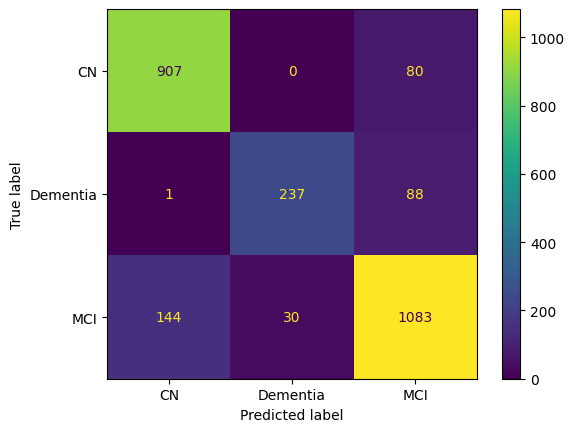

In [11]:
cm = confusion_matrix(y_test, y_pred_svc, labels = model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_svc.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%LDA MODEL%%%%%%%%%%%%%%%%%**

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(42)
model_LDA = LinearDiscriminantAnalysis() #Using LDA model
model_LDA.fit(X_train,y_train) #Training
y_pred_lda = model_LDA.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_lda)))
print(classification_report(y_test,y_pred_lda))
print(model_LDA.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_lda),3))
models.append('LDA')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy: 0.7852140077821012
              precision    recall  f1-score   support

          CN       0.76      0.82      0.79       987
    Dementia       0.85      0.74      0.79       326
         MCI       0.79      0.77      0.78      1257

    accuracy                           0.79      2570
   macro avg       0.80      0.78      0.79      2570
weighted avg       0.79      0.79      0.79      2570

['CN' 'Dementia' 'MCI']


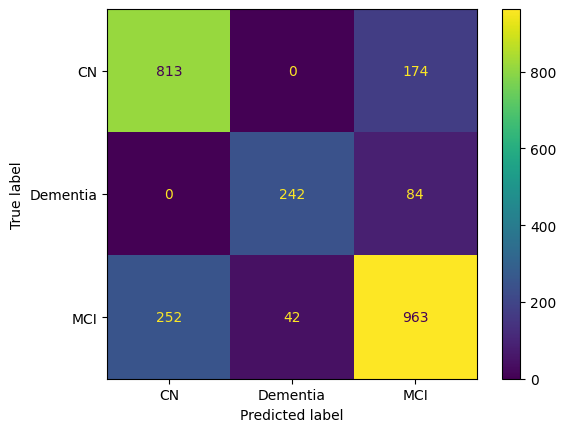

In [13]:
cm = confusion_matrix(y_test, y_pred_lda, labels = model_LDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_LDA.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%NAIVE BAYES MODEL%%%%%%%%%%%%%%%%%**





In [14]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(42)
model_NBC = GaussianNB() #Using Naive Bayes Classifier model
model_NBC.fit(X_train,y_train) #Training
y_pred_nbc = model_NBC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_nbc)))
print(classification_report(y_test,y_pred_nbc))
print(model_NBC.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_nbc),3))
models.append('NBC')

Model accuracy: 0.7828793774319066
              precision    recall  f1-score   support

          CN       0.76      0.90      0.82       987
    Dementia       0.68      0.85      0.76       326
         MCI       0.85      0.67      0.75      1257

    accuracy                           0.78      2570
   macro avg       0.76      0.81      0.78      2570
weighted avg       0.80      0.78      0.78      2570

['CN' 'Dementia' 'MCI']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


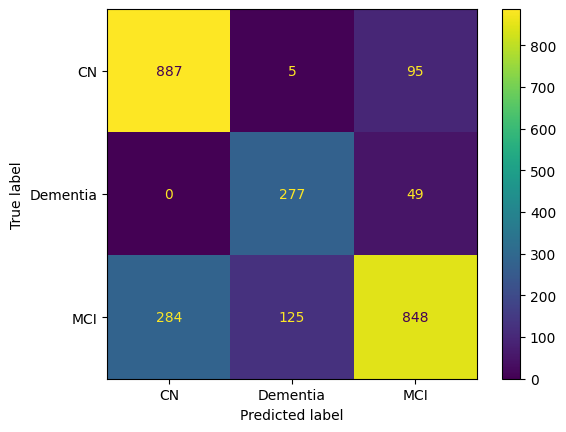

In [15]:
cm = confusion_matrix(y_test, y_pred_nbc, labels = model_NBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_NBC.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%RANDOM FOREST MODEL%%%%%%%%%%%%%%%%%**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_RFC = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC.fit(X_train,y_train) #Training
y_pred_rfc = model_RFC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc)))
print(classification_report(y_test,y_pred_rfc))
print(model_RFC.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc),3))
models.append('RFC')

<ipython-input-16-66c150ec7b13>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train,y_train) #Training


Model accuracy: 0.8832684824902723
              precision    recall  f1-score   support

          CN       0.93      0.87      0.90       987
    Dementia       0.88      0.76      0.82       326
         MCI       0.85      0.93      0.89      1257

    accuracy                           0.88      2570
   macro avg       0.89      0.85      0.87      2570
weighted avg       0.89      0.88      0.88      2570

['CN' 'Dementia' 'MCI']


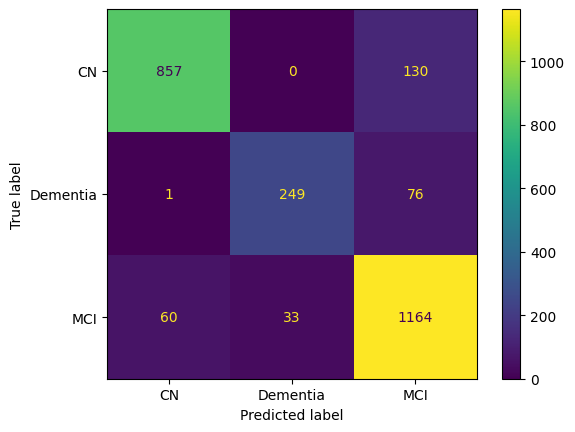

In [17]:
cm = confusion_matrix(y_test, y_pred_rfc, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%XGBOOST MODEL%%%%%%%%%%%%%%%%%**

In [18]:
list_labels = list(labels.DX)
label_converter = {
    "CN": 0,
    "Dementia": 1,
    "MCI": 2

}

def convert_labels(labels):
    converted_labels = [label_converter[label] for label in labels]
    return converted_labels


In [19]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list = list(y_train.DX)
y_test_list = list(y_test.DX)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train1 = convert_labels(y_train_list)
y_test1 = convert_labels(y_test_list)
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 3,  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB = xgb.train(params, train_dmatrix, num_rounds)

# Make predictions on the testing set
y_pred_xgb = model_XGB.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb)))
print(classification_report(y_test1,y_pred_xgb))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb),3))
models.append('XGB')

Model accuracy: 0.8797665369649805
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       987
           1       0.88      0.76      0.81       326
           2       0.85      0.92      0.88      1257

    accuracy                           0.88      2570
   macro avg       0.88      0.85      0.86      2570
weighted avg       0.88      0.88      0.88      2570

{'CN': 0, 'Dementia': 1, 'MCI': 2}


{'CN': 0, 'Dementia': 1, 'MCI': 2}


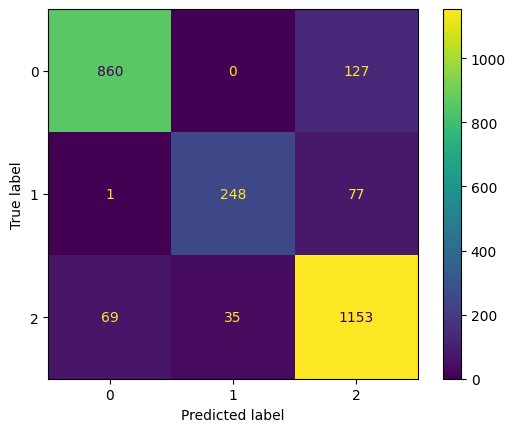

In [20]:
print(label_converter)
cm = confusion_matrix(y_test1, y_pred_xgb, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

# **%%%%%%%%%%%%%%%OVER SAMPLING PERFORMANCE%%%%%%%%%%%%%%%%%**

In [21]:
#Reading the data set from the drive
raw = pd.read_csv("/content/drive/MyDrive/Final_Project_Data/df_imputed.csv")
# print(raw)
data = raw
 #Showing an example of the first 5 rows.
#*Note*: There are 65 columns in each row.

In [22]:
labels = data[['DX']]
train_data = data.drop(['DX','RID','VISCODE'], axis = 1)
print("Shape of the training set: {}".format(train_data.shape))

Shape of the training set: (8566, 22)


In [23]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.3, stratify=labels)
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:5996
Number of test samples:2570


In [24]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# Display class distribution before resampling
print("Class distribution before resampling:", Counter(y_train.DX))
print("Samples before resampling:", len(y_train.DX))
# Apply RandomOverSampler to balance the classes


ros = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution after resampling
print("Class distribution after resampling:", Counter(y_train_resampled.DX))
print("Samples after resampling:", len(y_train_resampled.DX))


Class distribution before resampling: Counter({'MCI': 2933, 'CN': 2303, 'Dementia': 760})
Samples before resampling: 5996
Class distribution after resampling: Counter({'MCI': 2933, 'CN': 2933, 'Dementia': 2933})
Samples after resampling: 8799


# **%%%%%%%%%%%%%RFC - OVER SAMPLED PERFORMANCE%%%%%%%%%%%%%%%**

In [26]:
model_RFC_balanced = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC_balanced.fit(X_train_resampled,y_train_resampled) #Training
y_pred_rfc_balenced = model_RFC_balanced.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc_balenced)))
print(classification_report(y_test,y_pred_rfc_balenced))
print(model_RFC_balanced.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc_balenced),3))
models.append('RFC_OS')

<ipython-input-26-896989e31cd8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC_balanced.fit(X_train_resampled,y_train_resampled) #Training


Model accuracy: 0.8898832684824902
              precision    recall  f1-score   support

          CN       0.92      0.91      0.92       987
    Dementia       0.84      0.79      0.81       326
         MCI       0.88      0.90      0.89      1257

    accuracy                           0.89      2570
   macro avg       0.88      0.87      0.87      2570
weighted avg       0.89      0.89      0.89      2570

['CN' 'Dementia' 'MCI']


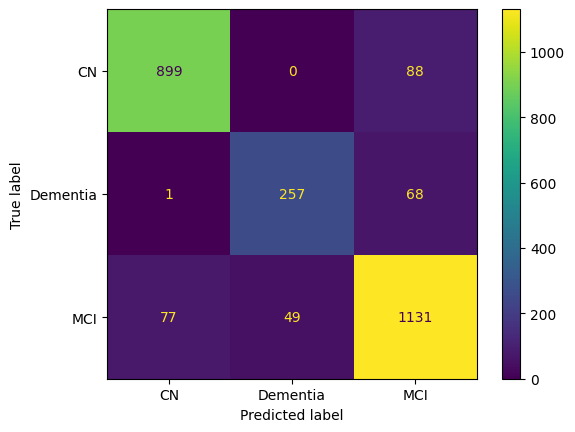

In [27]:
cm = confusion_matrix(y_test, y_pred_rfc_balenced, labels = model_RFC_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC_balanced.classes_)
disp.plot()

# **%%%%%%%%%%%%%XGB - OVER SAMPLED PERFORMANCE%%%%%%%%%%%%%%%**

In [28]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list_resampled = list(y_train_resampled.DX)
y_test_list_resampled = list(y_test.DX)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train_resampled1 = convert_labels(y_train_list_resampled)
y_test1 = convert_labels(y_test_list_resampled)
train_dmatrix_resampled = xgb.DMatrix(data=X_train_resampled, label=y_train_resampled1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 3,  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB_balanced = xgb.train(params, train_dmatrix_resampled, num_rounds)

# Make predictions on the testing set
y_pred_xgb_balanced = model_XGB_balanced.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb_balanced)))
print(classification_report(y_test1,y_pred_xgb_balanced))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb_balanced),3))
models.append('XGB_OS')

Model accuracy: 0.8840466926070039
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       987
           1       0.77      0.86      0.81       326
           2       0.90      0.86      0.88      1257

    accuracy                           0.88      2570
   macro avg       0.86      0.88      0.87      2570
weighted avg       0.89      0.88      0.88      2570

{'CN': 0, 'Dementia': 1, 'MCI': 2}


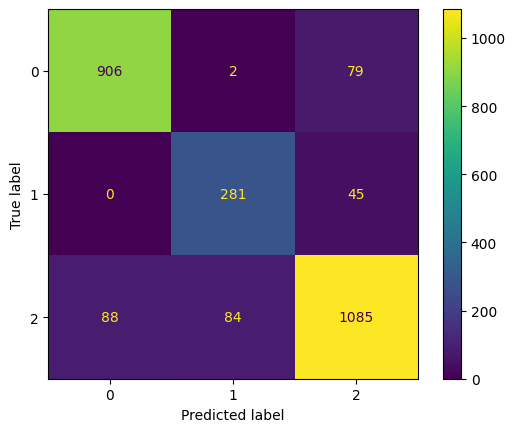

In [29]:
cm = confusion_matrix(y_test1, y_pred_xgb_balanced, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

# **%%%%%%%%%%%%%SUMMERIZE%%%%%%%%%%%%%%%**

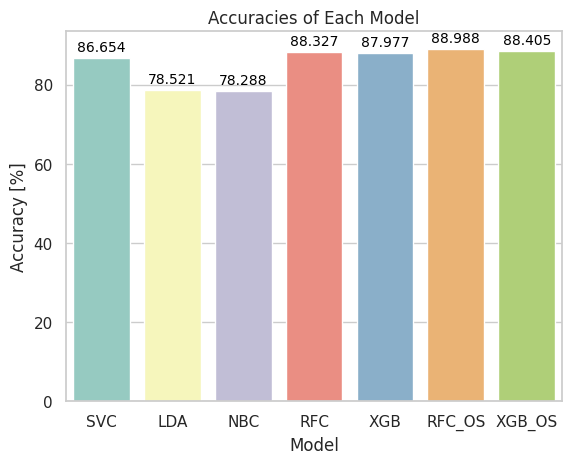

In [30]:
# Create a bar plot
sns.set(style="whitegrid")  # Optional: Set a seaborn style
ax = sns.barplot(x=models, y=accuracies, palette = "Set3")


# Add labels and a title
plt.xlabel("Model")
plt.ylabel("Accuracy [%]")
plt.title("Accuracies of Each Model")

# Display the values in the center of each bar
for i, v in enumerate(accuracies):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()